In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pymap3d as pm
from bagpy import bagreader

# Local
from evaluation_classes import RecordedPath, TaskPath, PathPlotter, HLCPath
from evaluation_tools import PATHTYPES

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


Python older than 3.7 detected. 


In [2]:
%matplotlib widget

### loading the task

In [3]:
tp1 = TaskPath(
    path_to_taskfile__="IL/binyamina/Block7_0812_RTK.json",
    path_name_="Task_Biny_B7",
    plot_format_='x')

origin = tp1.get_first_waypoint()
lat_og, lon_og = origin[0], origin[1]
tp1.define_origin_coordinates(origin[0], origin[1])

Not Using Pymap
json task loaded | 307 waypoints loaded

TaskPath instance created
Origin coordinates set to (32.50937774, 34.9359948)


### Load mark-event bag

In [4]:
# Parameters for loading up recordings
country = "IL"
ranch = "binyamina"
date = "02_feb" # dd_mmm
directory = os.path.join("/home/iony/Documents/mark-events",country,ranch,date)
filename = os.path.join("mark_event1_081352","event_020422_081352_413714"+".bag")
bag_path = os.path.join(directory,filename)

markevent_1_bag = RecordedPath(
    path_to_recordfile_=bag_path,
    origin_='bag',
    path_name_ = "markevent_1_bag",
    plot_format_='--')

markevent_1_bag.define_origin_coordinates(lat_=lat_og, lon_=lon_og)

Not Using Pymap
[INFO]  Data folder /home/iony/Documents/mark-events/IL/binyamina/02_feb/mark_event1_081352/event_020422_081352_413714 already exists. Not creating.
'/home/iony/Documents/mark-events/IL/binyamina/02_feb/mark_event1_081352/event_020422_081352_413714.bag' loaded in 0.4541 seconds to path markevent_1_bag
Origin coordinates set to (32.50937774, 34.9359948)


### Loading paths from HLC 

In [5]:
# Parameters for loading up the HLC path
country = "IL"
ranch = "binyamina"
date = "02_feb" # dd_mmm
filename = "IN_ROW3_GEO_PATH"
hlc_path_directory = f"Task_CSVs/{country}/{ranch}/{date}/{filename}.csv"

row3_hlcpath = HLCPath(path_to_csv_=hlc_path_directory, path_name_="IN_ROW3_GEO_PATH", plot_format_='x', use_pymap_=False)
row3_hlcpath.define_origin_coordinates(lat_=lat_og, lon_=lon_og)
row3_hlcpath.set_returntype_forplot(PATHTYPES.LOWRES_PATH)

Not Using Pymap
path set with (20, 2) waypoints
PATHTYPE not defined yet
HLCPath 'IN_ROW3_GEO_PATH' created

Origin coordinates set to (32.50937774, 34.9359948)
PATHTYPE LOWRES_PATH set for IN_ROW3_GEO_PATH_LOWRES_PATH


In [6]:
# Parameters for loading up the HLC path
country = "IL"
ranch = "binyamina"
date = "02_feb" # dd_mmm
filename = "_GEO_PATH_Block7"

######### path loading #########
hlc_path_directory = f"Task_CSVs/{country}/{ranch}/{date}/{filename}.csv"

hlc_path = HLCPath(path_to_csv_=hlc_path_directory, path_name_="hlc_block7_GEO_PATH", plot_format_='x', use_pymap_=False)
hlc_path.define_origin_coordinates(lat_=lat_og, lon_=lon_og)
hlc_path.set_returntype_forplot(PATHTYPES.LOWRES_PATH)

# Same file but with pymap use
hlc_path2 = HLCPath(path_to_csv_=hlc_path_directory, path_name_="hlc_block7_GEO_PATH_pymap", plot_format_='x', use_pymap_=True)
hlc_path2.define_origin_coordinates(lat_=lat_og, lon_=lon_og)
hlc_path2.set_returntype_forplot(PATHTYPES.LOWRES_PATH)

# Same file but with pymap use

Not Using Pymap
path set with (306, 2) waypoints
PATHTYPE not defined yet
HLCPath 'hlc_block7_GEO_PATH' created

Origin coordinates set to (32.50937774, 34.9359948)
PATHTYPE LOWRES_PATH set for hlc_block7_GEO_PATH_LOWRES_PATH
Using Pymap
path set with (306, 2) waypoints
PATHTYPE not defined yet
HLCPath 'hlc_block7_GEO_PATH_pymap' created

Origin coordinates set to (32.50937774, 34.9359948)
PATHTYPE LOWRES_PATH set for hlc_block7_GEO_PATH_pymap_LOWRES_PATH


# Plotting

In [7]:
pp = PathPlotter()


PathPlotter instance created


In [8]:
tp1._set_plot_format('-xr')
hlc_path._set_plot_format('--.b')
markevent_1_bag._set_plot_format("-xb")
row3_hlcpath._set_plot_format('-og')

In [9]:
# Plotting lat lon paths
markevent_1_bag.toggle_pymap_use(False)
row3_hlcpath.toggle_pymap_use(False)

paths_to_plot = [row3_hlcpath, hlc_path, tp1, markevent_1_bag]

for path in paths_to_plot:
    path.set_returntype_forplot(PATHTYPES.LOWRES_PATH)

Not Using Pymap
Not Using Pymap
PATHTYPE LOWRES_PATH set for IN_ROW3_GEO_PATH_LOWRES_PATH
PATHTYPE LOWRES_PATH set for hlc_block7_GEO_PATH_LOWRES_PATH
PATHTYPE LOWRES_PATH set for Task_Biny_B7
PATHTYPE LOWRES_PATH set for markevent_1_bag


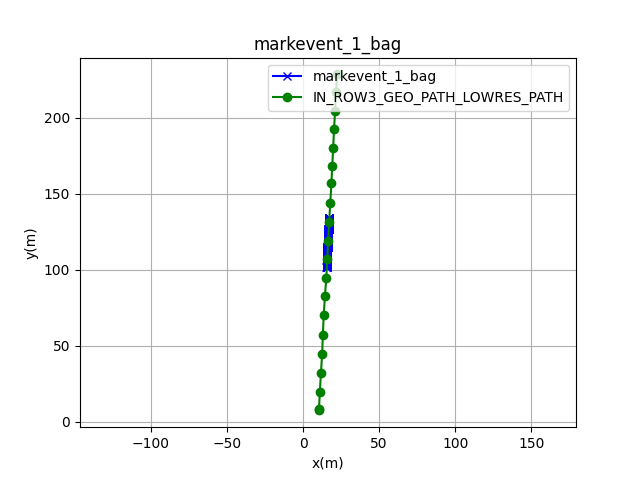

In [10]:
pp.plot_paths([markevent_1_bag, row3_hlcpath], "markevent_1_bag")